In [43]:
import os
import tensorflow as tf 
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [10]:
tf.config.list_physical_devices('GPU')

[]

In [14]:
data_dir= "data"

In [15]:
os.listdir(data_dir)

['happy_imgs', 'sad_imgs']

In [21]:
a= os.path.join(data_dir, 'happy_imgs')

In [22]:
os.listdir(a)

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1920px-face-smile.svg_.png',
 '1934412-happiness-1553188821.jpg',
 '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg',
 '2560px-Happy_People.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'ANLem4ZrfrNM76cJ8eBHBYWZYvpKHpGutq4MXuUArNG9s64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'GettyImages-565706549-949x534.jpg',
 'goup-happy-people-35582464.jpg',
 'group-of-happy-people-2.jpg',
 'happy-people-2.jpg',
 'happy-people-group-fb.jpg',
 'happy-people-in-the-poppy-field-1280x800-wide-wallpapers-net.jpg',
 'happy-people-pexels-rodnae-productions-8927342.jpg',
 'happy-people.jpeg',
 'happy-people2.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'Happy.jpg',
 'happy_1_1678616873966_1678616915228_1678616915228

In [12]:
image_extentions= ['jpg', 'jpeg', 'png', 'bmp']

In [33]:
import matplotlib.image as mpimg


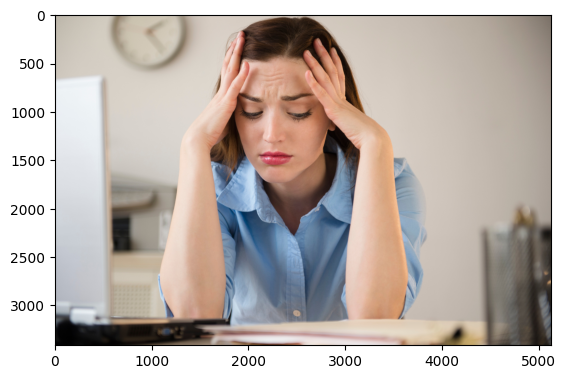

In [38]:
imgpath= 'C:\\Users\\Hp\\Desktop\\NN_classifier\\data\\sad_imgs\\crying-at-work.jpg'

img= mpimg.imread(imgpath)
plt.imshow(img)


In [41]:
# using cv2 to read images as numpy arrays
img= cv2.imread(os.path.join(data_dir, 'sad_imgs','crying-at-work.jpg' ))
img.shape

(3412, 5126, 3)

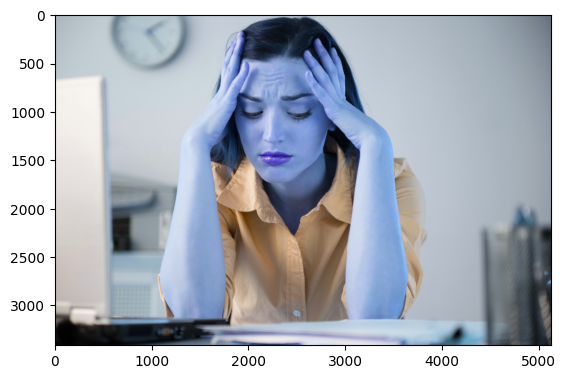

In [42]:
plt.imshow(img)